## Data Cleaning Stars Wars Data

In [1]:
import pandas as pd
star_wars=pd.read_csv('star_wars.csv', encoding='ISO-8859-1')

In [2]:
pd.set_option('display.max_columns', 38)
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Data issues found

From looking at the data, we can see that the there are several issues in a few areas:

#### 1. Yes No responses

There are 5 columns where yes no responses are given, these should be True False responses instead.

#### 2. "Which of the following Star Wars films have you seen? Please select all that apply." column values

The data underneath columns related to this question are stored as the movie title names, but they should be True and False Values.

#### 3. In relation to the following questions, columns are titled as "Unnamed: #"

#### a. "Which of the following Star Wars films have you seen? Please select all that apply."

There are several columns in relation to this question. Those columns need renaming as they include the above question and "Unnamed :4" to "Unnamed :8". 

#### b. "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film."

Same as the question above, there are several columns that need to be renamed as they are "Unnamed: #" etc.

#### c. "Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her."

We need to find the appropriate character names for each columns, and rename the columns as such since, as with the other questions, they are currently "Unnamed: #" etc.

### 1. Cleaning Yes No responses by mapping the data
We have 5 columns where yes no responses have been given. These will be mapped to true false responses.

In [3]:
# we inspect the value counts of each responses including NaN
yes_no_cols= ['Have you seen any of the 6 films in the Star Wars franchise?',
      'Do you consider yourself to be a fan of the Star Wars film franchise?',
      'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
      ]

for col in yes_no_cols:
    print(star_wars[col].value_counts(dropna= False))

Yes         936
No          250
Response      1
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
Yes         552
NaN         350
No          284
Response      1
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64
No          615
NaN         358
Yes         213
Response      1
Name: Are you familiar with the Expanded Universe?, dtype: int64
NaN         973
No          114
Yes          99
Response      1
Name: Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦, dtype: int64
No          641
Yes         427
NaN         118
Response      1
Name: Do you consider yourself to be a fan of the Star Trek franchise?, dtype: int64


In [4]:
#mapping of Yes No responses to True and False.
yes_no= {'Yes': True, 'No': False}

for col in yes_no_cols:
    star_wars[col]= star_wars[col].map(yes_no)
    

### 2. Cleaning movies seen response columns
For the question "Which of the following Star Wars films have you seen? Please select all that apply", the data inputted in each column were:

- the movie title if the movie was seen
- NaN if the movie was not seen

This should be cleaned to just give True False responses.

In [5]:
import numpy as np

#creating dictionary for mapping
dict= {'Star Wars: Episode I  The Phantom Menace': True,
        'Star Wars: Episode II  Attack of the Clones': True,
        'Star Wars: Episode III  Revenge of the Sith': True,
        'Star Wars: Episode IV  A New Hope': True,
        'Star Wars: Episode V The Empire Strikes Back': True,
        'Star Wars: Episode VI Return of the Jedi': True,
        np.NaN: False}

# we only apply mapping to the columns referring to the relevant question
for column in star_wars.columns[3:9]: 
    star_wars[column] = star_wars[column].map(dict)
    

### 3. Cleaning column names using mapping
As mentioned before, a lot of the columns are named like "Unnamed: #", we will rename these columns so it is clear which question they actually are referring to e.g:

"Which of the following Star Wars films have you seen? Please select all that apply" 

or "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film." 

or "Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her."


#### 3a. Question: "Which of the following Star Wars films have you seen?  Please select all that apply"

In [6]:
star_wars=star_wars.rename(columns={
    'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_movie_1',
    'Unnamed: 4':'seen_movie_2',
    'Unnamed: 5':'seen_movie_3',
    'Unnamed: 6':'seen_movie_4',
    'Unnamed: 7':'seen_movie_5',
    'Unnamed: 8':'seen_movie_6'})

#### 3b. Question: "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film."

In [7]:
star_wars=star_wars.rename(columns={
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'rank_movie_1',
    'Unnamed: 10': 'rank_movie_2',
    'Unnamed: 11': 'rank_movie_3',
    'Unnamed: 12' : 'rank_movie_4',
    'Unnamed: 13' : 'rank_movie_5',
    'Unnamed: 14' : 'rank_movie_6'
    
})

#### 3c. Question "'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her."

In [8]:
star_wars.head(1)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_movie_1,seen_movie_2,seen_movie_3,seen_movie_4,seen_movie_5,seen_movie_6,rank_movie_1,rank_movie_2,rank_movie_3,rank_movie_4,rank_movie_5,rank_movie_6,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,NaN,NaN,True,True,True,True,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,NaN,NaN,NaN,Response,Response,Response,Response,Response


From the head view of the data, we can see the top row contains the character names.
In order of the columns, the character names are:
- Han Solo
- Luke Skywalker 
- Princess Leia Organa
- Anakin Skywalker
- Obi Wan Kenobi    
- Emperor Palpatine  
- Darth Vader    
- Lando Calrissian         
- Boba Fett   
- C-3P0         
- R2 D2 
- Jar Jar Binks   
- Padme Amidala     
- Yoda      

In [9]:
#character names to replace existing column titles
characters = {'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.':'Han Solo',
              'Unnamed: 16':'Luke Skywalker', 
              'Unnamed: 17':'Princess Leia Organa', 
              'Unnamed: 18': 'Anakin Skywalker', 
              'Unnamed: 19': 'Obi Wan Kenobi',       
              'Unnamed: 20': 'Emperor Palpatine', 
              'Unnamed: 21': 'Darth Vader', 
              'Unnamed: 22': 'Lando Calrissian', 
              'Unnamed: 23': 'Boba Fett',       
              'Unnamed: 24': 'C-3P0', 
              'Unnamed: 25': 'R2 D2', 
              'Unnamed: 26': 'Jar Jar Binks', 
              'Unnamed: 27': 'Padme Amidala',       
              'Unnamed: 28': 'Yoda'}

star_wars = star_wars.rename(columns=characters)

### Finding and dropping rows where RespondentID is null

In [10]:
star_wars[star_wars['RespondentID'].isnull()]

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_movie_1,seen_movie_2,seen_movie_3,seen_movie_4,seen_movie_5,seen_movie_6,rank_movie_1,rank_movie_2,rank_movie_3,rank_movie_4,rank_movie_5,rank_movie_6,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,NaN,NaN,True,True,True,True,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,NaN,NaN,NaN,Response,Response,Response,Response,Response


In [11]:
star_wars= star_wars[pd.notnull(star_wars['RespondentID'])]

### Converting ranks column data to float

In [12]:
star_wars[star_wars.columns[9:15]]=star_wars[star_wars.columns[9:15]].astype(float)

### Final inspection of data

In [13]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_movie_1,seen_movie_2,seen_movie_3,seen_movie_4,seen_movie_5,seen_movie_6,rank_movie_1,rank_movie_2,rank_movie_3,rank_movie_4,rank_movie_5,rank_movie_6,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,True,False,False,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,False,NaN,False,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,False,NaN,True,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,True,False,False,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


The data is now cleaned.

In [14]:
# to export the cleaned data 
#star_wars.to_csv(r'clean.csv', index=False)

## Visualising Data

### Which Movies Have Respondents Seen?

Text(0.5, 1.0, 'Number of Respondents Who Have Seen Each Star Wars Movie')

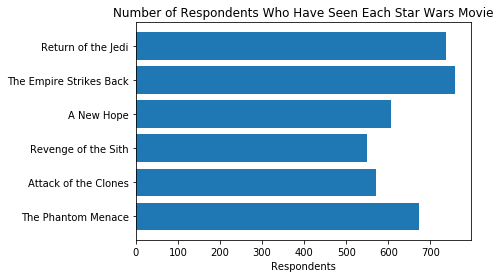

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

movies_cols = ['seen_movie_1','seen_movie_2','seen_movie_3',
               'seen_movie_4','seen_movie_5','seen_movie_6']

movies = ['The Phantom Menace',
          'Attack of the Clones','Revenge of the Sith',
          'A New Hope',
          'The Empire Strikes Back',
          'Return of the Jedi']

plt.barh(range(6), star_wars[movies_cols].sum() )
plt.yticks(range(6), movies)
plt.xlabel('Respondents')
plt.title('Number of Respondents Who Have Seen Each Star Wars Movie')

The original trilogy (A New Hope, The Empire Strikes Back, Return of the Jedi) have been watched more overall than the later 3 movies.

However, The Phantom Menance (the prequel trilogy was watched by more respondents than A New Hope (from the original trilogy).

### Mean Ranking Comparison

In [16]:
rank_cols= ['rank_movie_1', 'rank_movie_2', 'rank_movie_3',
            'rank_movie_4', 'rank_movie_5', 'rank_movie_6']

#### Ranking From Respondants Who Have Seen Every Star Wars Movie
This is the mean ranking of each movie given by respondants who have seen every movie.

In [17]:
seen_all = ((star_wars['seen_movie_1']== True)
            & (star_wars['seen_movie_2']== True) 
            & (star_wars['seen_movie_3']== True)
            & (star_wars['seen_movie_4']== True )
            & (star_wars['seen_movie_5']== True )
            & (star_wars['seen_movie_6']== True))
star_wars_seen_all = star_wars[seen_all]

ranks_seen_all = star_wars_seen_all[rank_cols].mean()

#### Ranking From Respondants Who Have Not Seen Every Star Wars Movie
This is the mean ranking of each movie given by respondants who have not seen every movie.

In [18]:
star_wars_not_all = star_wars[seen_all== False]
ranks_not_all = star_wars_not_all[rank_cols].mean()

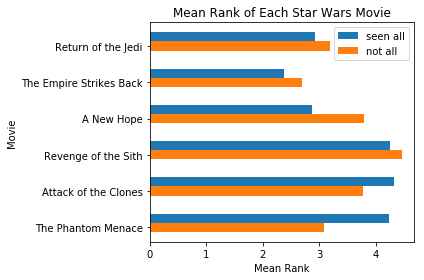

In [19]:
import numpy as np

fig, ax = plt.subplots()

index = np.arange(6)
bar_width = 0.25

p1= ax.barh(index+bar_width, ranks_seen_all, bar_width, label='seen all')
p2= ax.barh(index, ranks_not_all, bar_width, label='not all')

ax.set_ylabel('Movie')
ax.set_xlabel('Mean Rank')
ax.set_title('Mean Rank of Each Star Wars Movie')

plt.yticks(index , movies)

ax.legend()

fig.tight_layout()
plt.show()

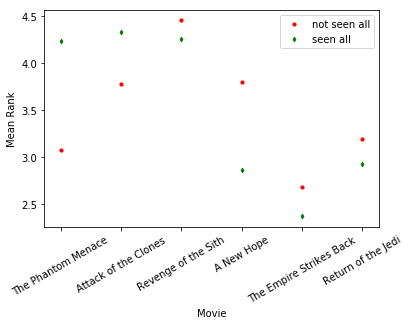

In [20]:
fig = plt.figure()
ax1 = fig.add_subplot(111)


ax1.scatter(range(6), ranks_not_all, s=10, c='r', marker="o", label='not seen all')
ax1.scatter(range(6), ranks_seen_all, s=10, c='g', marker="d", label='seen all')

ax1.xaxis.set_tick_params(rotation=30)
plt.xticks(range(6), movies)
plt.xlabel('Movie')
plt.ylabel('Mean Rank')

plt.legend(loc='upper right');
plt.show()

### How do the rankings compare?

Of the respondents who had watched all the movies, the mean rankings of the 3 prequel trilogy movies are very similar. Whereas respondents who had not seen all the movies had ranked The Phantam Menance as 1 rank above Revenge of the Sith on average (mean).

We saw initially that there was a high number of people who watched Episode I, but this number goes down for the 2nd and 3rd Episodes, whilst the rankings for the same get progressively worse over all respondents. 

Looking at the original trilogy movies, on average, they are ranked higher than the prequel triology by respondents who have seen all the movies (significantly) and also by those who had not seen all the movies (less significantly).

## Favourite movies of the series

Here we only look at responses from respondents who have seen all movies. A respondents favourite movie of the series is the movie that they have Ranked 1 (in truth they could've have more than 1 favourite but the survey only allowed 1 Ranked 1 movie).

In [21]:
# we count the rank responses to each movie 
rank_count=star_wars_seen_all[rank_cols].apply(pd.Series.value_counts)
rank_count

,rank_movie_1,rank_movie_2,rank_movie_3,rank_movie_4,rank_movie_5,rank_movie_6
1.0,47,18,27,128,169,82
2.0,30,47,34,107,133,120
3.0,47,52,68,86,71,147
4.0,129,84,121,60,33,44
5.0,76,186,104,30,49,26
6.0,142,84,116,60,16,52


In [22]:
# we extract the row related to rank 1 count for each movie
# this states the number of people who had said this was their top
# star wars movie. 
# Then convert this into a percentage of respondents 
favourite = {}
for col in rank_cols:
    favourite[col]=rank_count[col][1]*100/471
    
favourite= pd.DataFrame.from_dict(favourite,orient='index', 
                                  columns=['Percentage'])
favourite

,Percentage
rank_movie_1,9.978769
rank_movie_2,3.821656
rank_movie_3,5.732484
rank_movie_4,27.176221
rank_movie_5,35.881104
rank_movie_6,17.409766


Text(0.5, 1.0, 'Favourite Movie')

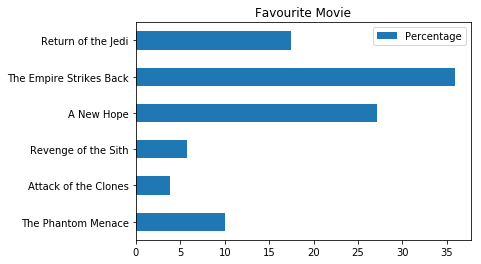

In [23]:
favourite.plot.barh()
plt.yticks(range(6), movies)
plt.title('Favourite Movie')

Around 20% of respondents stated that the a movie from the prequel trilogy were their favourite.

About 36% of respondents favourite movie was The Empire Strikes Back, which is more than double than that for Return of the Jedi.

But the least popular movie of the orignal trilogy is still more popular (as a favourite movie) than the most popular movie of the prequel trilogy. 

## Character Favorability Ratings

In [24]:
character_cols= ['Han Solo',
                 'Luke Skywalker',
                 'Princess Leia Organa',
                 'Anakin Skywalker',
                 'Obi Wan Kenobi',
                 'Emperor Palpatine',
                 'Darth Vader',
                 'Lando Calrissian',
                 'Boba Fett',
                 'C-3P0',
                 'R2 D2',
                 'Jar Jar Binks',
                 'Padme Amidala',
                 'Yoda']

In [25]:
favourability= star_wars[character_cols].apply(pd.Series.value_counts)*100/834

favourable_row = favourability.loc['Very favorably'] + favourability.loc['Somewhat favorably']
unfavourable_row= favourability.loc['Very unfavorably'] + favourability.loc['Somewhat unfavorably']
favourable_row.name = 'Favorably'
unfavourable_row.name = 'Unfavorably'
favourability= favourability.append([favourable_row, unfavourable_row])

favourability_simple= favourability.drop(['Very favorably',
                           'Somewhat favorably',
                           'Very unfavorably',
                           'Somewhat unfavorably'])

favourability_simple.reset_index(level=0, inplace=True)
favourability_simple

,index,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
0,Neither favorably nor unfavorably (neutral),5.275779,4.556355,5.755396,16.187050,5.155875,25.539568,10.071942,28.297362,29.736211,9.472422,6.834532,19.664269,24.820144,6.115108
1,Unfamiliar (N/A),1.798561,0.719424,0.959233,6.235012,2.038369,18.705036,1.199041,17.745803,15.827338,1.798561,1.199041,13.069544,19.664269,1.199041
2,Favorably,91.247002,92.446043,90.767386,61.630695,89.928058,30.335731,57.673861,43.764988,34.892086,84.292566,89.568345,29.016787,42.086331,89.808153
3,Unfavorably,1.079137,1.918465,2.158273,14.628297,1.798561,23.021583,30.095923,8.513189,16.906475,3.597122,1.918465,36.690647,11.031175,1.918465


In [26]:
tidy= pd.melt(favourability_simple, id_vars=['index'], value_vars=character_cols)
tidy.head()

,index,variable,value
0,Neither favorably nor unfavorably (neutral),Han Solo,5.275779
1,Unfamiliar (N/A),Han Solo,1.798561
2,Favorably,Han Solo,91.247002
3,Unfavorably,Han Solo,1.079137
4,Neither favorably nor unfavorably (neutral),Luke Skywalker,4.556355


In [27]:
# to export the cleaned data 
# tidy.to_csv(r'tidy.csv', index=False)

In [28]:
#finding character order of favourability
favourable_order_df= tidy[tidy['index']=='Favorably'].sort_values('value', ascending=False)
favourable_order= favourable_order_df['variable']
favourable_order

6           Luke Skywalker
2                 Han Solo
10    Princess Leia Organa
18          Obi Wan Kenobi
54                    Yoda
42                   R2 D2
38                   C-3P0
14        Anakin Skywalker
26             Darth Vader
30        Lando Calrissian
50           Padme Amidala
34               Boba Fett
22       Emperor Palpatine
46           Jar Jar Binks
Name: variable, dtype: object

Text(0.5, 0, 'Percentage')

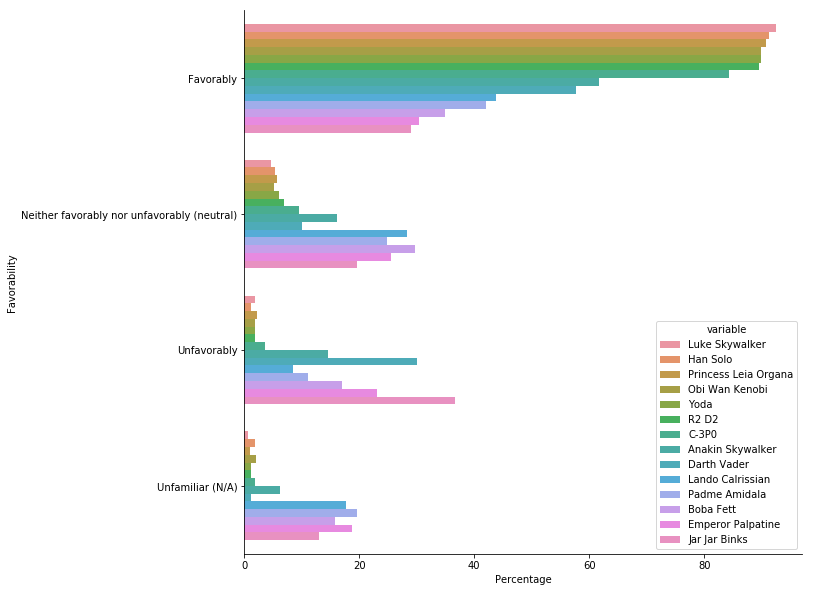

In [29]:
# plotting character favouribility ratings
import seaborn as sns
fig, ax1 = plt.subplots(figsize=(10, 10))


sns.barplot(y='index', x='value', hue='variable', data=tidy, 
            ax=ax1, hue_order=favourable_order, orient= 'h',
           order=['Favorably', 'Neither favorably nor unfavorably (neutral)',
                  'Unfavorably', 'Unfamiliar (N/A)'])
sns.despine(fig)
plt.ylabel('Favorability')
plt.xlabel('Percentage')


The characters who are most favorable are the main protagonists, who first appeared in the orignal triology (Episodes 3-6).

Jar Jar Binks is the least favorable character even though he is a protagonist. He is recognised as the most hated character is Star Wars by fans and critics alike.

The next least favorable character is Darth Vader, as one of the main antagonists of the Saga this makes sense.